In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib
import datetime

In [2]:
#puts all BTC data into a ticker
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
#creates csv file with btc data from yahoo finance
if os.path.exists("BTC-USD"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00+00:00,26474.181641,26916.669922,26343.949219,26719.291016,12711619225,0.0,0.0
2023-05-27 00:00:00+00:00,26720.181641,26888.882812,26621.140625,26868.353516,7892015141,0.0,0.0
2023-05-28 00:00:00+00:00,26871.158203,28193.449219,26802.751953,28085.646484,14545229578,0.0,0.0


In [5]:
#converts all info to datetime to make it more manageable
btc.index = pd.to_datetime(btc.index)

In [6]:
#delete unwanted colums
del btc["Dividends"]
del btc["Stock Splits"]

In [7]:
#convert everything to lowerwcase to make it easier to deal with
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

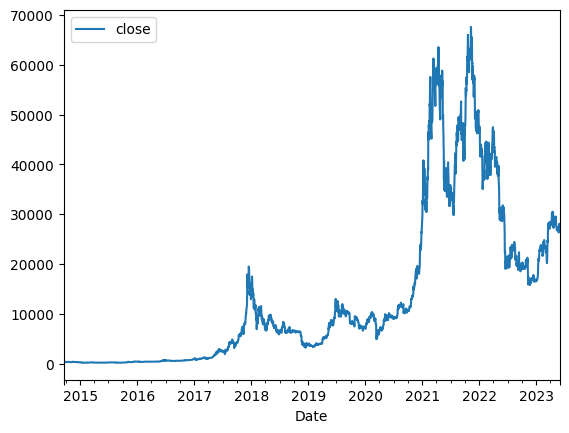

In [8]:
#create graph of btc to current day
btc.plot.line(y="close", use_index=True)

In [9]:
#read wiki sentiment analysis file
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [10]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025
2009-04-07,0.000000,0.000000,0.000
2009-04-08,0.000000,0.000000,0.000
2009-04-09,0.000000,0.000000,0.000
2009-04-10,0.000000,0.000000,0.000
...,...,...,...
2023-05-25,0.133333,-0.033500,0.050
2023-05-26,0.133333,-0.033500,0.050
2023-05-27,0.133333,-0.033500,0.050
2023-05-28,0.133333,-0.033500,0.050


In [11]:
#set btc datetime timezone to none to match wiki timezone
btc = btc.tz_localize(None)

In [12]:
#merge btc csv with the sentiment analysis file
btc = btc.merge(wiki, left_index=True, right_index=True)

In [13]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2023-05-25,26329.460938,26591.519531,25890.593750,26476.207031,13851122697,0.133333,-0.033500,0.050000
2023-05-26,26474.181641,26916.669922,26343.949219,26719.291016,12711619225,0.133333,-0.033500,0.050000
2023-05-27,26720.181641,26888.882812,26621.140625,26868.353516,7892015141,0.133333,-0.033500,0.050000
2023-05-28,26871.158203,28193.449219,26802.751953,28085.646484,14545229578,0.133333,-0.033500,0.050000


In [14]:
#close price of the day after
btc["tomorrow"] = btc["close"].shift(-1)

In [15]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2023-05-25,26329.460938,26591.519531,25890.593750,26476.207031,13851122697,0.133333,-0.033500,0.050000,26719.291016
2023-05-26,26474.181641,26916.669922,26343.949219,26719.291016,12711619225,0.133333,-0.033500,0.050000,26868.353516
2023-05-27,26720.181641,26888.882812,26621.140625,26868.353516,7892015141,0.133333,-0.033500,0.050000,28085.646484
2023-05-28,26871.158203,28193.449219,26802.751953,28085.646484,14545229578,0.133333,-0.033500,0.050000,27745.884766


In [16]:
#check if tomorrow is higher than today - convert boolean into an int
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [17]:
#check if classification is working
btc["target"].value_counts()

target
1    1689
0    1488
Name: count, dtype: int64

In [18]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2023-05-25,26329.460938,26591.519531,25890.593750,26476.207031,13851122697,0.133333,-0.033500,0.050000,26719.291016,1
2023-05-26,26474.181641,26916.669922,26343.949219,26719.291016,12711619225,0.133333,-0.033500,0.050000,26868.353516,1
2023-05-27,26720.181641,26888.882812,26621.140625,26868.353516,7892015141,0.133333,-0.033500,0.050000,28085.646484,1
2023-05-28,26871.158203,28193.449219,26802.751953,28085.646484,14545229578,0.133333,-0.033500,0.050000,27745.884766,0


In [19]:
#using random classifier to train algorithm withh the expected target
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [20]:
#to test how accurate the prediction is - based on target made from previous data
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.4959349593495935

In [21]:
#creates a function that combines the target and the predicted into one dataframe
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [22]:
#backtests data on over 3 years of data using dataframe created above
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [23]:
#different ML framework using backtesting and a different form of decision trees to create new predictions
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [24]:
#making sure the 1-0 classification for target data is working
predictions["predictions"].value_counts()

predictions
1    1250
0     832
Name: count, dtype: int64

In [25]:
#compares actual values to predicted values
precision_score(predictions["target"], predictions["predictions"])

0.496

In [26]:
predictions

,target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,1
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-05-25,1,0
2023-05-26,1,0
2023-05-27,1,0
2023-05-28,0,0


In [27]:
#finds trends through various columns in the last period of time
def compute_rolling(btc):
    horizons = [2,7,60,365] #each new predictor is checked every 1,7,60 and 365 days
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    #computes rolling averages as new predictors
    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean() #prevents data leakeage - not using present target to crate rolling average
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [28]:
#computed rolling average over btc dataframe and puts value in new predictors
btc, new_predictors = compute_rolling(btc.copy())

In [29]:
#tests model with new parameters set above
predictions = backtest(btc, model, new_predictors)

In [30]:
#compare predictions again with target
precision_score(predictions["target"], predictions["predictions"])

0.5364238410596026

In [31]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-05-25,1,0
2023-05-26,1,0
2023-05-27,1,0
2023-05-28,0,0
